In [ ]:
# Q0: Import libraries (without networkx)
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, deque
import pandas as pd
import gdown
from google.colab import files
import random

In [ ]:
# Base Graph class for all questions
class Graph:
    def __init__(self, directed=False):
        self.adj = defaultdict(dict)
        self.directed = directed

    def add_edge(self, u, v, w=1.0):
        self.adj[u][v] = w
        if not self.directed:
            self.adj[v][u] = w

    def nodes(self):
        return list(self.adj.keys())

    def edges(self):
        e = []
        for u in self.adj:
            for v in self.adj[u]:
                if not self.directed or (self.directed and (v,u) not in e):
                    e.append((u,v))
        return e

    def neighbors(self, n):
        return list(self.adj[n].keys())

# Load network
def load_net():
    G = Graph(directed=False)  # For Q3 and Q4
    D = Graph(directed=True)   # For Q2

    with open('inf-euroroad', 'r') as f:
        next(f)
        next(f)
        for l in f:
            s, t = map(int, l.strip().split())
            G.add_edge(s, t)
            D.add_edge(s, t)

    # Add weights for Q3
    for u, v in G.edges():
        w = np.random.uniform(0.1, 1.0)
        G.adj[u][v] = w
        G.adj[v][u] = w

    return D, G

# Download dataset
url = 'https://drive.google.com/uc?id=1i3bO-YHV6cjiihXMvigIbUDE7tve-D34'
gdown.download(url, 'inf-euroroad', quiet=False)
D, G = load_net()

Downloading...
From: https://drive.google.com/uc?id=1i3bO-YHV6cjiihXMvigIbUDE7tve-D34
To: /content/inf-euroroad
100%|██████████| 11.3k/11.3k [00:00<00:00, 17.7MB/s]


Generating 100 random graphs...
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%


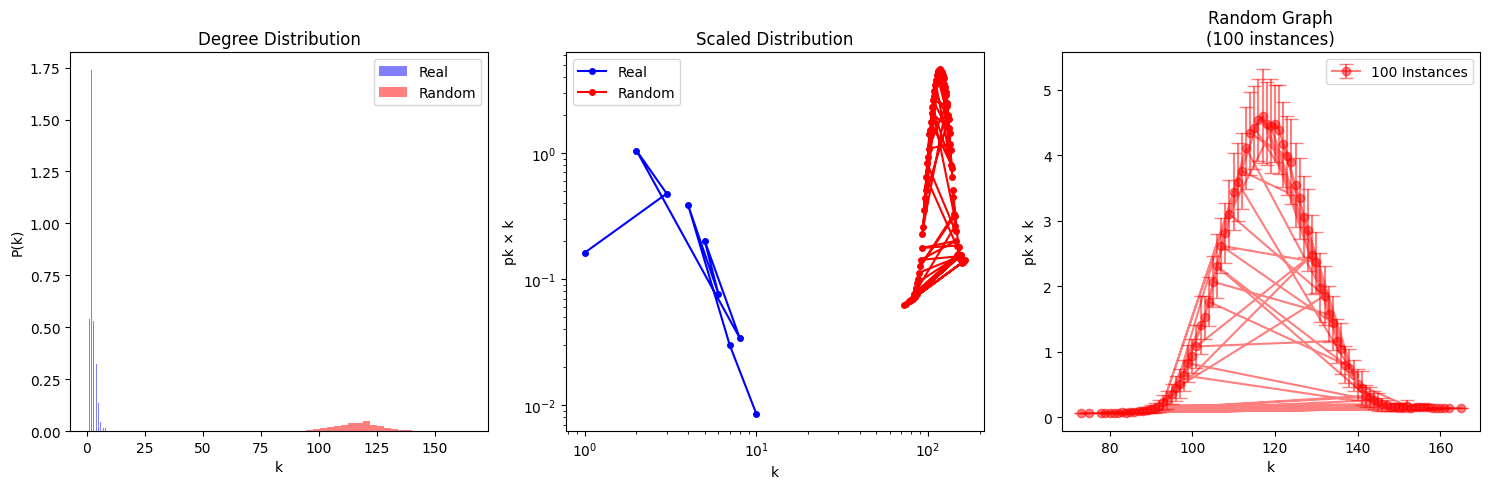


Stats:
Nodes: 1174
Edges: 2834
p: 0.0041
Avg degree (Real): 2.41
Avg degree (Random): 117.29


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Q4: Gilbert Random Graph Comparison (Undirected)
def generate_gilbert_graph(G, p):
    gilbert_G = Graph(directed=False)  # Creating an undirected Gilbert random graph
    nodes = G.nodes()

    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):  # Avoid duplicate edges in undirected graph
            if random.random() < p:  # Edge exists with probability p
                gilbert_G.add_edge(nodes[i], nodes[j])

    return gilbert_G

def compare_dist(g1, g2):
    """Compare degree distributions"""
    # Get degrees
    d1 = [len(g1.adj[n]) for n in g1.nodes()]
    d2 = [len(g2.adj[n]) for n in g2.nodes()]

    # Calculate distributions
    n1 = len(g1.nodes())
    n2 = len(g2.nodes())

    # Real network
    c1 = defaultdict(int)
    for d in d1:
        c1[d] += 1
    p1 = {k: v / n1 for k, v in c1.items()}

    # Random network
    c2 = defaultdict(int)
    for d in d2:
        c2[d] += 1
    p2 = {k: v / n2 for k, v in c2.items()}

    # Scale (pk × k)
    s1 = {k: k * v for k, v in p1.items()}
    s2 = {k: k * v for k, v in p2.items()}

    return s1, s2, d1, d2

def plot_comp(g):
    """Plot comparison"""
    # Parameters
    n = len(g.nodes())
    e = len(g.edges())
    p = (2.0 * e) / (n * (n - 1))

    # Store results
    a = defaultdict(list)  # all scaled pk
    d = []  # all degrees
    r = None  # real dist
    v = None  # real degrees

    # Generate 100 instances
    print("Generating 100 random graphs...")
    for i in range(100):
        if i % 10 == 0:
            print(f"{i}%")

        # Random graph
        h = generate_gilbert_graph(g, 0.1)  # FIXED: Use `g`, not `n`

        # Compare
        s1, s2, d1, d2 = compare_dist(g, h)

        if r is None:
            r = s1
            v = d1

        for k, x in s2.items():
            a[k].append(x)
        d.extend(d2)

    # Averages
    m = {k: np.mean(x) for k, x in a.items()}
    s = {k: np.std(x) for k, x in a.items()}

    # Plot
    plt.figure(figsize=(15, 5))

    # Degree Distribution
    plt.subplot(131)
    plt.hist(v, bins=30, density=True, alpha=0.5, label='Real', color='blue')
    plt.hist(d, bins=30, density=True, alpha=0.5, label='Random', color='red')
    plt.xlabel('k')
    plt.ylabel('P(k)')
    plt.title('Degree Distribution')
    plt.legend()

    # Scaled Distribution
    plt.subplot(132)
    plt.loglog(list(r.keys()), list(r.values()), 'bo-', label='Real', markersize=4)
    plt.loglog(list(m.keys()), list(m.values()), 'ro-', label='Random', markersize=4)
    plt.xlabel('k')
    plt.ylabel('pk × k')
    plt.title('Scaled Distribution')
    plt.legend()

    # 100 Instances
    plt.subplot(133)
    x = list(m.keys())
    y = list(m.values())
    z = [s[k] for k in m.keys()]
    plt.errorbar(x, y, yerr=z, fmt='ro-', label='100 Instances', alpha=0.5, capsize=5)
    plt.xlabel('k')
    plt.ylabel('pk × k')
    plt.title('Random Graph\n(100 instances)')
    plt.legend()

    plt.tight_layout()
    plt.savefig('q4_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Stats
    print("\nStats:")
    print(f"Nodes: {n}")
    print(f"Edges: {e}")
    print(f"p: {p:.4f}")
    print(f"Avg degree (Real): {np.mean(v):.2f}")
    print(f"Avg degree (Random): {np.mean(d):.2f}")

# Run analysis
D, G = load_net()  # Load the real-world network
plot_comp(G)
